In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
params = ["radius", "texture", "perimeter", "area",
          "smoothness", "compactness", "concavity",
          "concave points", "symmetry", "fractal dimension"];
stats = ["(mean)", "(stderr)", "(worst)"]
labels = ["patient ID", "Malignant/Benign"]

for p in params:
    for s in stats:
        labels.append(p + " " + s)

tumor_data = pd.io.parsers.read_csv("breast-cancer-train.dat",header=None,names=labels)

features = tumor_data[labels[2:]]

features.head()

,radius (mean),radius (stderr),radius (worst),texture (mean),texture (stderr),texture (worst),perimeter (mean),perimeter (stderr),perimeter (worst),area (mean),...,concavity (worst),concave points (mean),concave points (stderr),concave points (worst),symmetry (mean),symmetry (stderr),symmetry (worst),fractal dimension (mean),fractal dimension (stderr),fractal dimension (worst)
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
mean_label = [labels[1]] + labels[2::3] 
print(mean_label)

['Malignant/Benign', 'radius (mean)', 'texture (mean)', 'perimeter (mean)', 'area (mean)', 'smoothness (mean)', 'compactness (mean)', 'concavity (mean)', 'concave points (mean)', 'symmetry (mean)', 'fractal dimension (mean)']


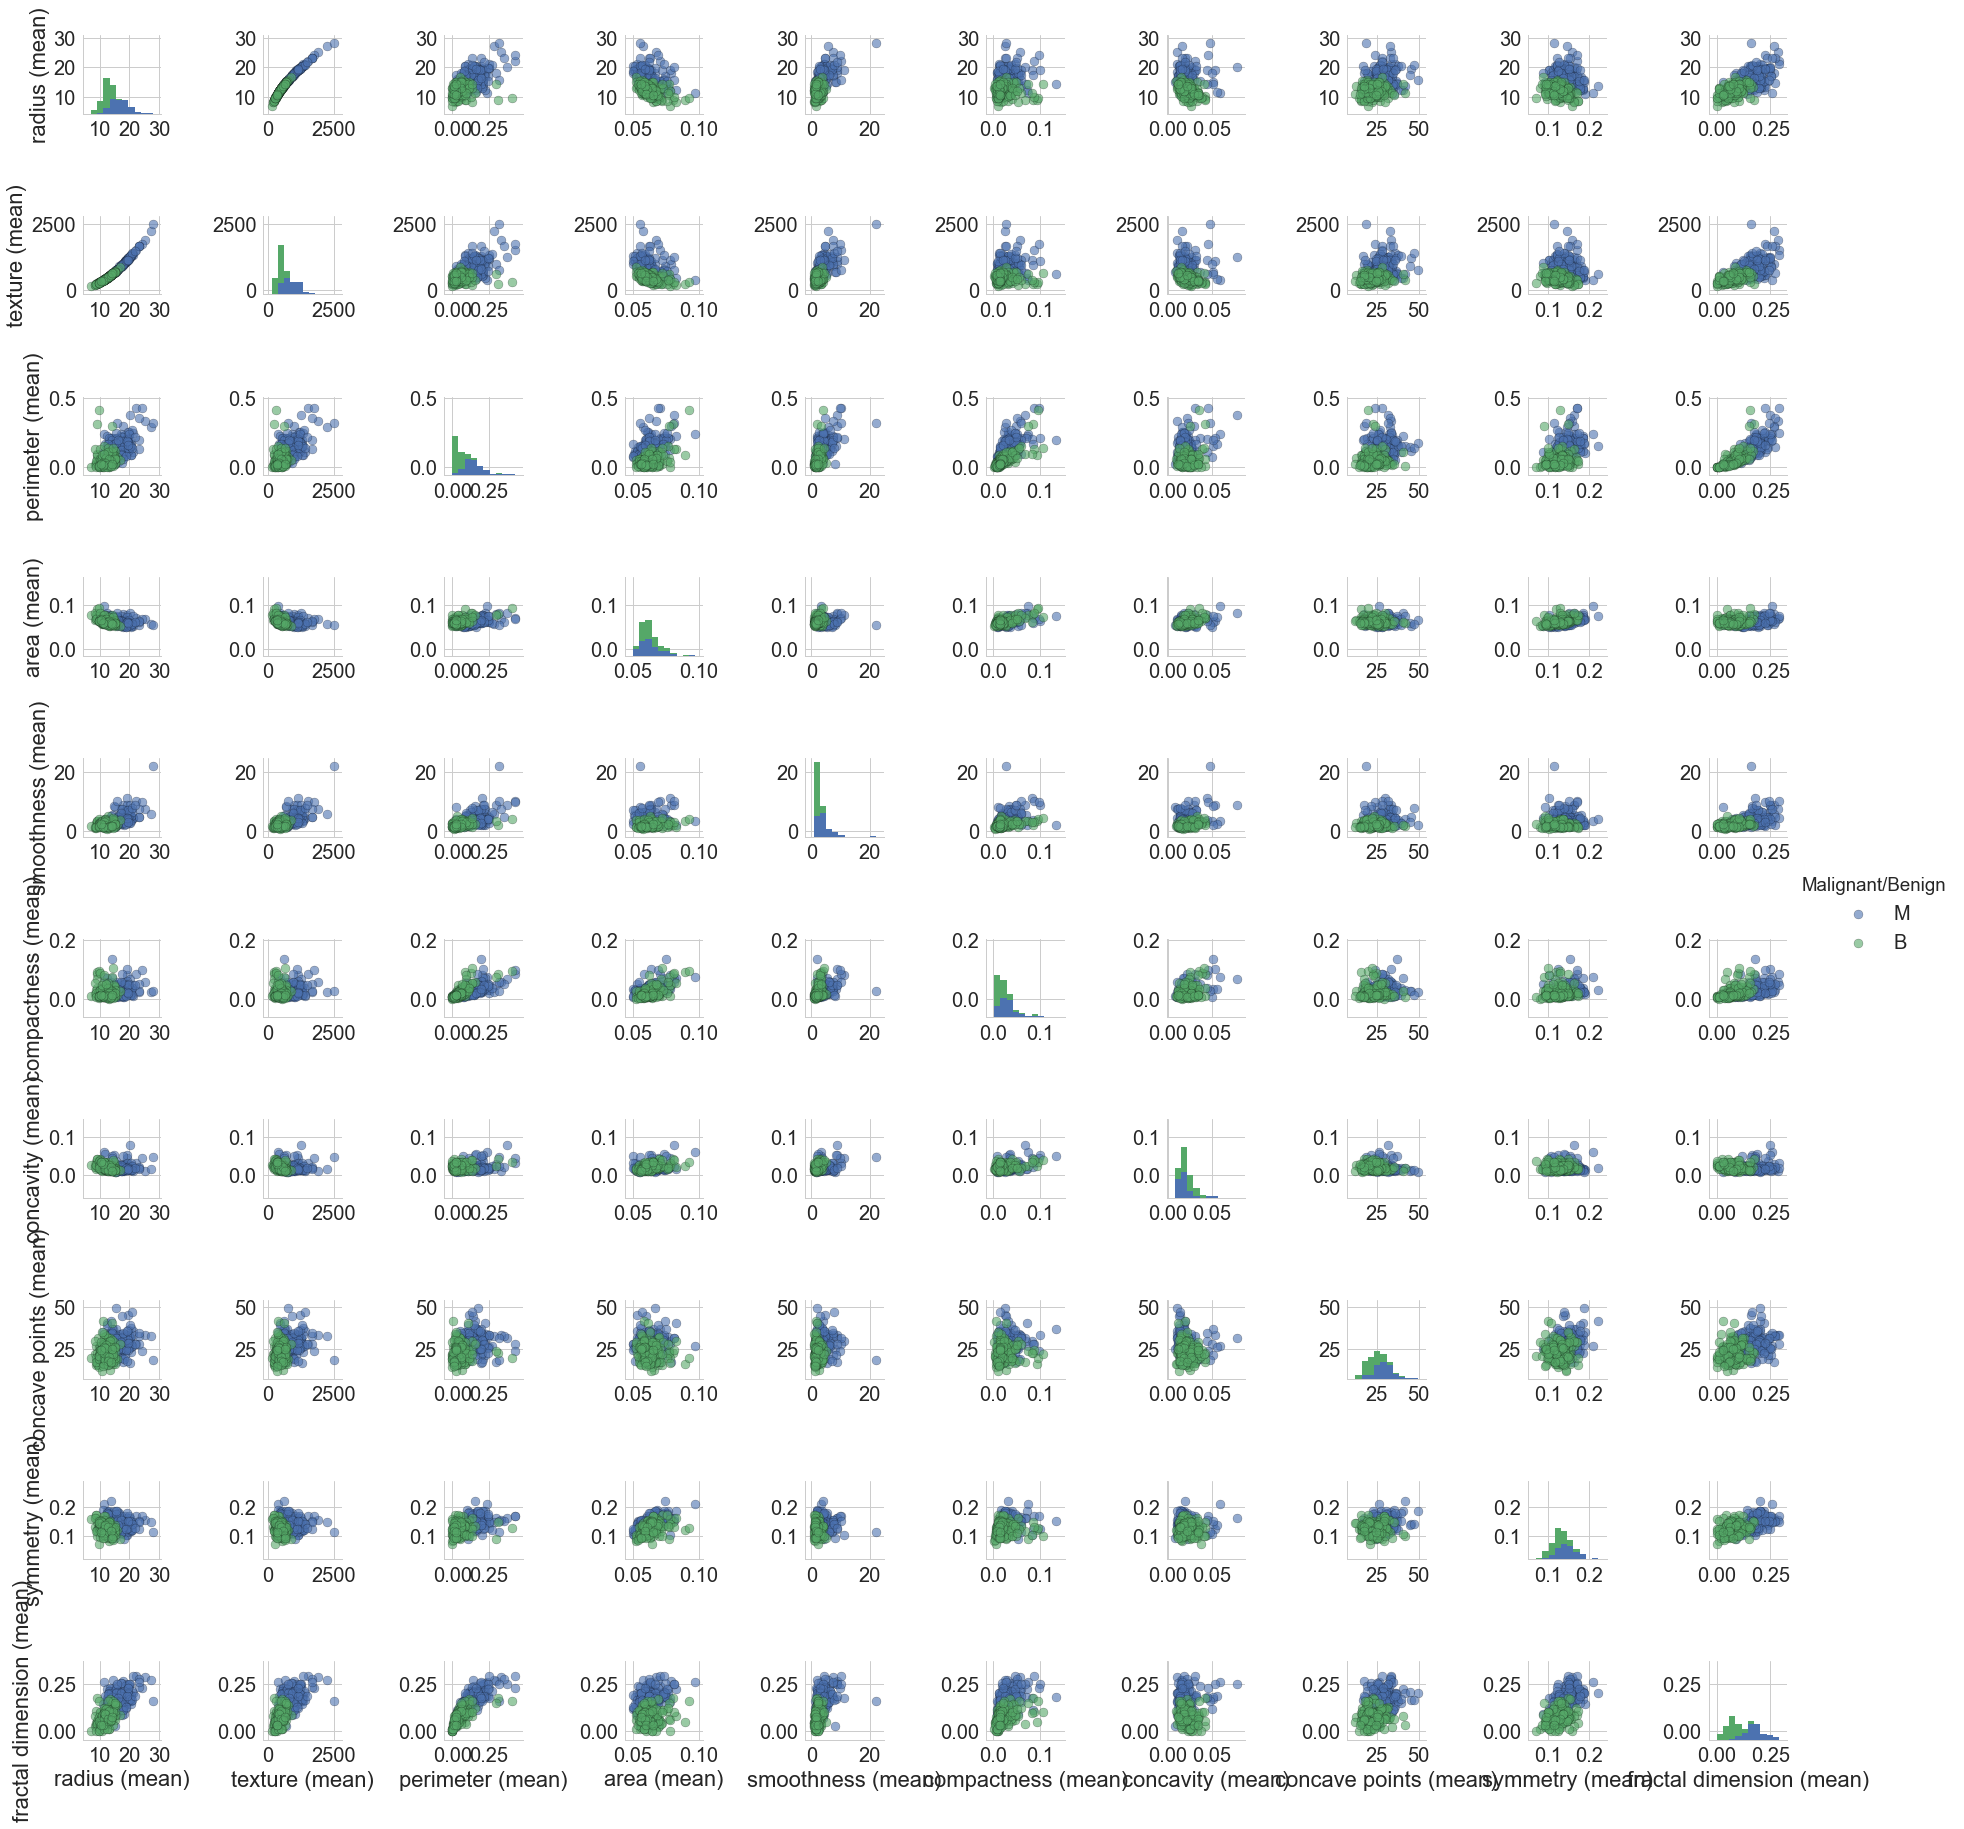

In [4]:
sns.pairplot(tumor_data[mean_label], hue="Malignant/Benign", plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

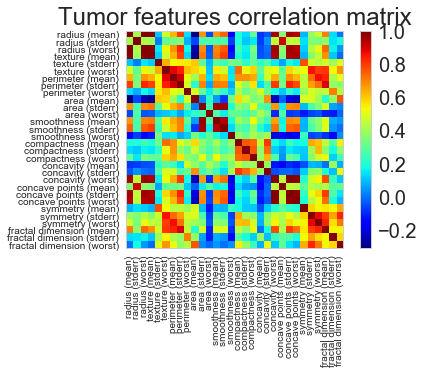

In [5]:
corr_matrix = features.corr()
# plot correlation matrix
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(corr_matrix, cmap=cm.get_cmap('jet'))
plt.title('Tumor features correlation matrix')
plt.grid('off')
ax1.set_xticks(np.arange(features.shape[1]))
ax1.set_yticks(np.arange(features.shape[1]))
ax1.set_xticklabels(labels[2:],fontsize=10,rotation=90)
ax1.set_yticklabels(labels[2:],fontsize=10)
fig.colorbar(cax)

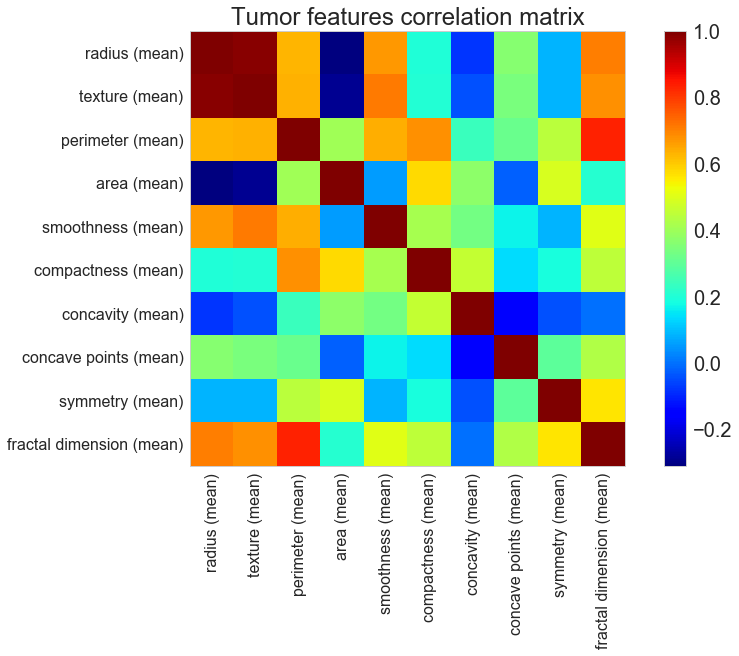

In [6]:
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(111)
cax = ax1.imshow(tumor_data[mean_label[1:]].corr(), cmap=cm.get_cmap('jet'))
plt.title('Tumor features correlation matrix')
plt.grid('off')
ax1.set_xticks(np.arange(len(mean_label[1:])))
ax1.set_yticks(np.arange(len(mean_label[1:])))
ax1.set_xticklabels(mean_label[1:],fontsize=16,rotation=90)
ax1.set_yticklabels(mean_label[1:],fontsize=16)
fig.colorbar(cax)

In [7]:
X = (features - features.mean())/features.std()

U, S, Vt = np.linalg.svd(X, full_matrices=False)

variances = S**2

V = Vt.T

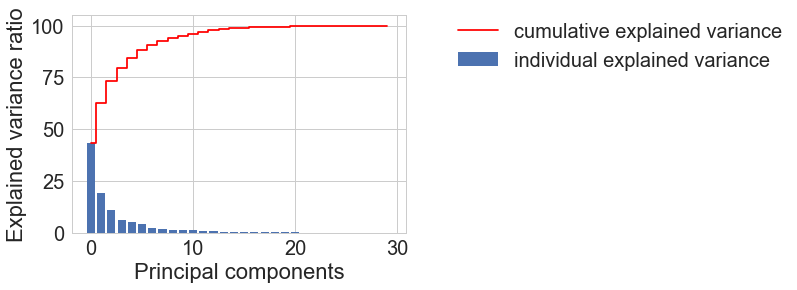

In [8]:
tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, 'r', where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [9]:
cum_var_exp

array([  43.39946344,   62.59238425,   73.40687734,   79.43377319,
         84.38534142,   88.44267647,   90.70202752,   92.40314689,
         93.81109327,   95.00733279,   96.09327633,   96.94979856,
         97.76955554,   98.28341965,   98.62610703,   98.9147503 ,
         99.12033911,   99.31807613,   99.46078286,   99.57431509,
         99.67744567,   99.76450833,   99.83132474,   99.89027957,
         99.93992972,   99.96606966,   99.99033414,   99.99631036,
         99.99951529,  100.        ])

In [10]:
k = 6
Xstar=X@V[:,:k]
tumor_pca_data = tumor_data[labels[:2]].copy()
pca_labels = []
for i in range(k):
    lab = 'p'+str(i)
    pca_labels += [lab]
    tumor_pca_data[lab] = Xstar[:,i]  

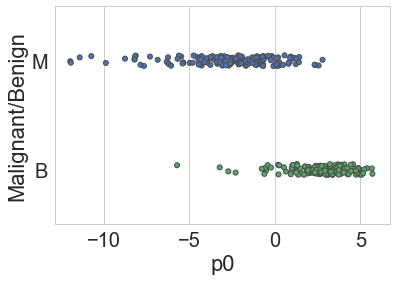

In [11]:
sns.stripplot(x="p0",y="Malignant/Benign", data=tumor_pca_data, jitter=0.05, linewidth=1)

In [12]:
def plot_arrow(vector,scale,text_label,text_posx,text_posy):
    plt.arrow(0, 0, scale*vector[0], scale*vector[1], head_width=0.1, head_length=0.1, fc='r', ec='r', lw=5)
    plt.text(scale*vector[0]*text_posx, scale*vector[1]*text_posy, text_label , color='black', ha='center', va='center', fontsize=18)

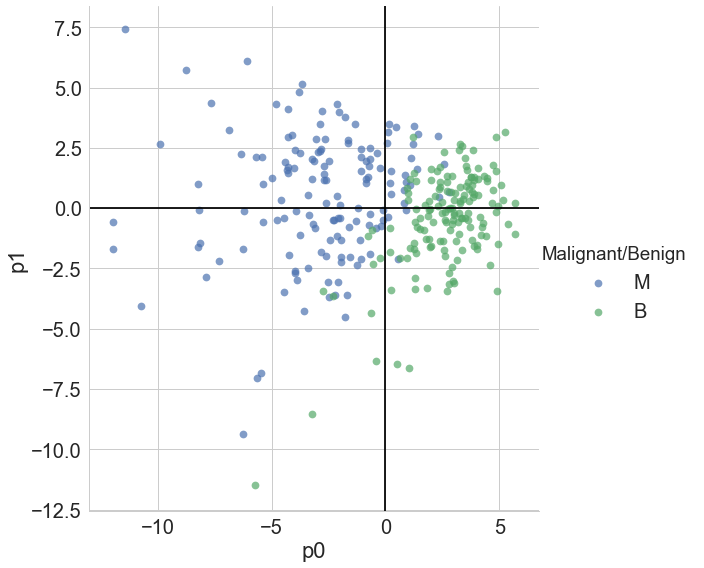

In [13]:
g1 = sns.lmplot('p0', 'p1', tumor_pca_data, hue='Malignant/Benign', fit_reg=False, size=8, scatter_kws={'alpha':0.7,'s':60})

ax = g1.axes[0,0]
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')


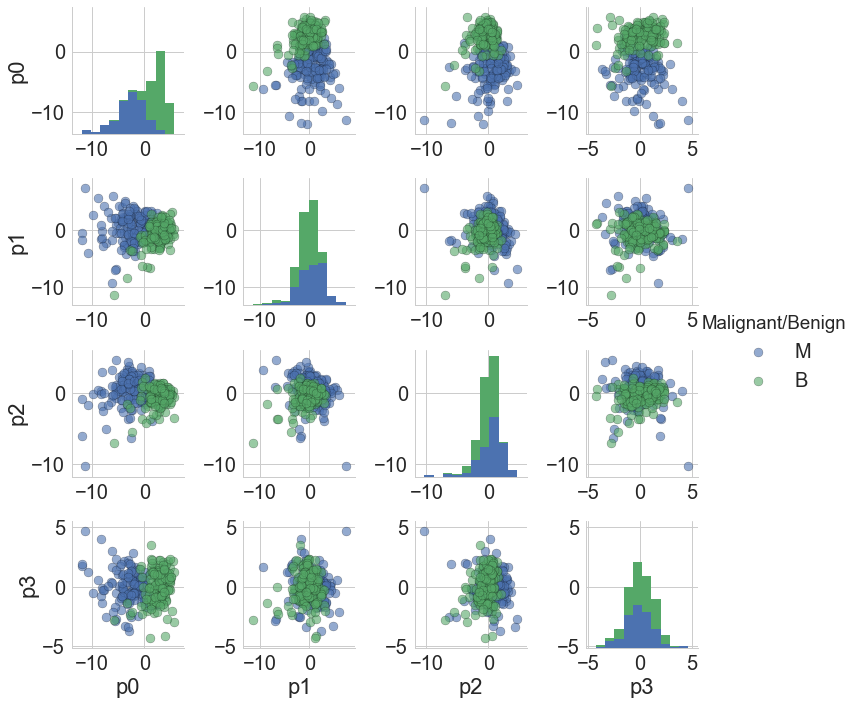

In [14]:
labelset = ['Malignant/Benign','p0', 'p1','p2','p3']
sns.pairplot(tumor_pca_data[labelset],hue='Malignant/Benign', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

Text(0.5,1,'influence of original features in p0')

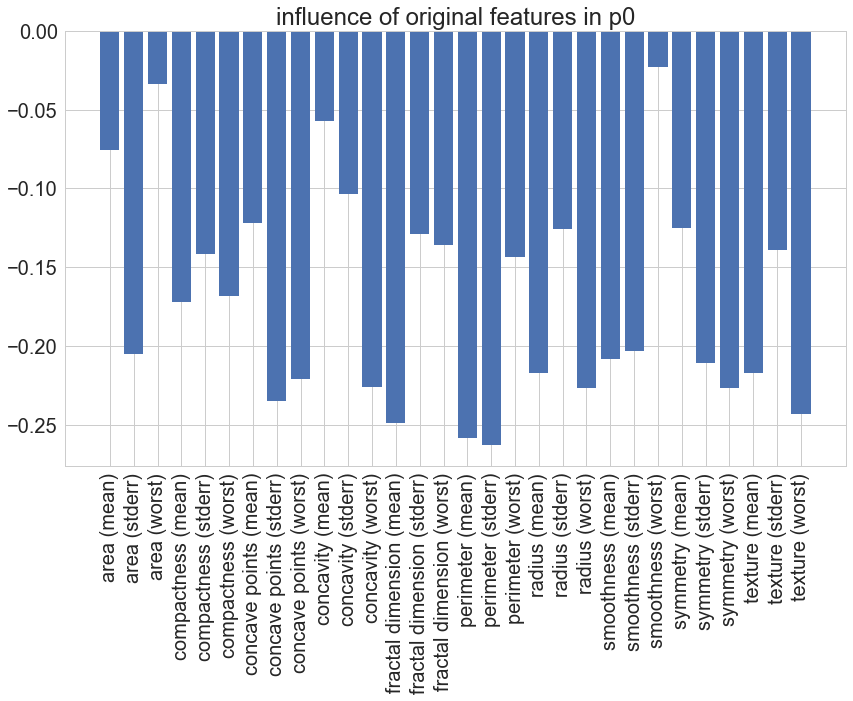

In [15]:
plt.subplots(figsize = (14,8))
plt.bar(labels[2:],V[:,0])
plt.xticks(rotation=90)
plt.title('influence of original features in p0')

In [204]:
import pandas as pd
import numpy as np
from io import StringIO
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [205]:
params = ["radius", "texture", "perimeter", "area",
          "smoothness", "compactness", "concavity",
          "concave points", "symmetry", "fractal dimension"];
stats = ["(mean)", "(stderr)", "(worst)"]
labels = ["patient ID", "Malignant/Benign"]

for p in params:
    for s in stats:
        labels.append(p + " " + s)

tumor_data = pd.io.parsers.read_csv("breast-cancer-train.dat",header=None,names=labels)

In [206]:
new_data = pd.DataFrame(tumor_data[["Malignant/Benign", 'smoothness (mean)', 'radius (mean)']][272:278])


mean_smooth = new_data['smoothness (mean)'].mean()
mean_radius = new_data['radius (mean)'].mean()

print(mean_smooth,mean_radius)
new_data['smoothness (zero mean)'] = new_data['smoothness (mean)'] - new_data['smoothness (mean)'].mean()
new_data['radius (zero mean)'] = new_data['radius (mean)'] - new_data['radius (mean)'].mean()

new_data

3.555166666666667 15.241999999999999


,Malignant/Benign,smoothness (mean),radius (mean),smoothness (zero mean),radius (zero mean)
272,M,8.867,21.750,5.311833,6.508
273,B,1.750,9.742,-1.805167,-5.500
274,M,2.765,17.930,-0.790167,2.688
275,B,4.021,11.890,0.465833,-3.352
276,B,1.565,11.330,-1.990167,-3.912
277,M,2.363,18.810,-1.192167,3.568


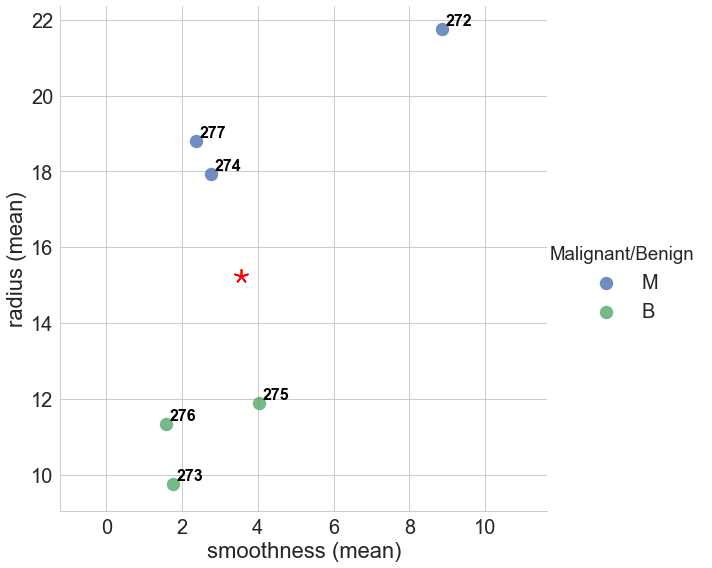

In [207]:
g1 = sns.lmplot('smoothness (mean)', 'radius (mean)', new_data,  hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, size=8)
ax = g1.axes[0,0]
ax.axis('equal')

for i in range(272,278):
    x = new_data['smoothness (mean)'][i] + 0.1
    y = new_data['radius (mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)
        
ax.scatter(mean_smooth,mean_radius,  s=180, c='r', marker=(5, 2))

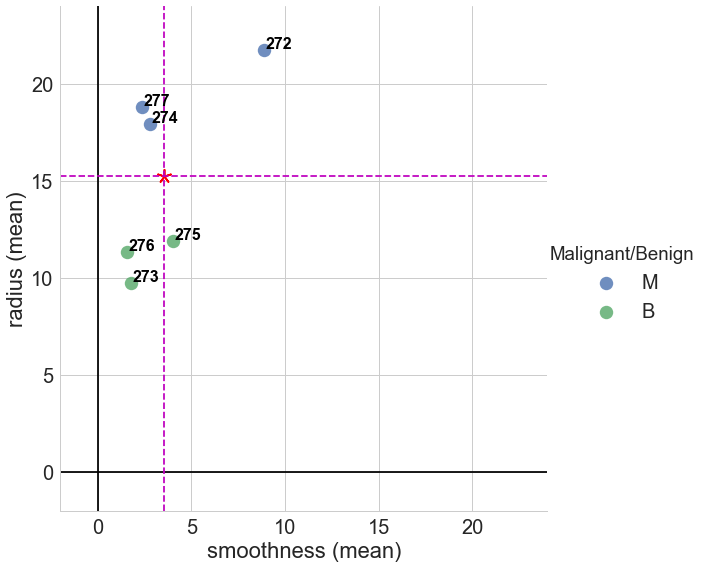

In [203]:
g1 = sns.lmplot('smoothness (mean)', 'radius (mean)', new_data,  hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, size=8)
ax = g1.axes[0,0]
plt.xlim(-2,24)
plt.ylim(-2,24)
for i in range(272,278):
    x = new_data['smoothness (mean)'][i] + 0.1
    y = new_data['radius (mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)
        
ax.scatter(mean_smooth,mean_radius,  s=180, c='r', marker=(5, 2))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axhline(y=mean_radius, color='m',linestyle='--')
ax.axvline(x=mean_smooth, color='m',linestyle='--')

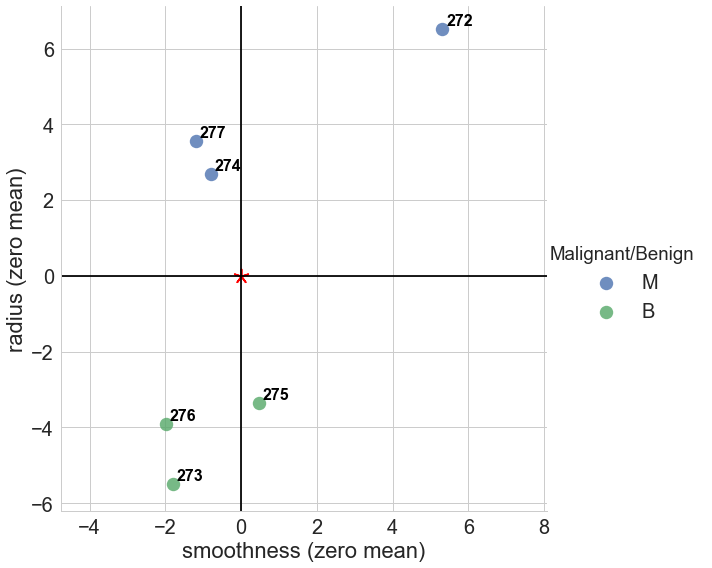

In [189]:

g1 = sns.lmplot('smoothness (zero mean)', 'radius (zero mean)', new_data, hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, size=8)
ax = g1.axes[0,0]
ax.axis('equal')

for i in range(272,278):
    x = new_data['smoothness (zero mean)'][i] + 0.1
    y = new_data['radius (zero mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

ax.scatter(0,0,  s=200, c='r', marker=(5, 2))

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

## Get covariance matrix

In [156]:
A = new_data[['smoothness (zero mean)', 'radius (zero mean)']]
A.cov()

,smoothness (zero mean),radius (zero mean)
smoothness (zero mean),7.539518,8.868854
radius (zero mean),8.868854,23.819936


In [157]:
# Another way to get the covariance matrix
Xnp = np.array(X)
cov_matrix = (1/(len(X)-1))*Xnp.T@Xnp
print(cov_matrix)

[[  7.53951777   8.8688536 ]
 [  8.8688536   23.819936  ]]


## Singular value decomposition

In [158]:
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# variances = eig(covariance) = singular values squared
variances = S**2

print(variances)

print(S)

# principal directions
pc1_vec = Vt[0,:]
pc2_vec = Vt[1,:]

[ 138.58990634   18.20736249]
[ 11.77242143   4.26700861]


## Diagonalization of covariance matrix

In [159]:
(Vt.T@np.diag(variances)@Vt)/(len(X)-1)

array([[  7.53951777,   8.8688536 ],
       [  8.8688536 ,  23.819936  ]])

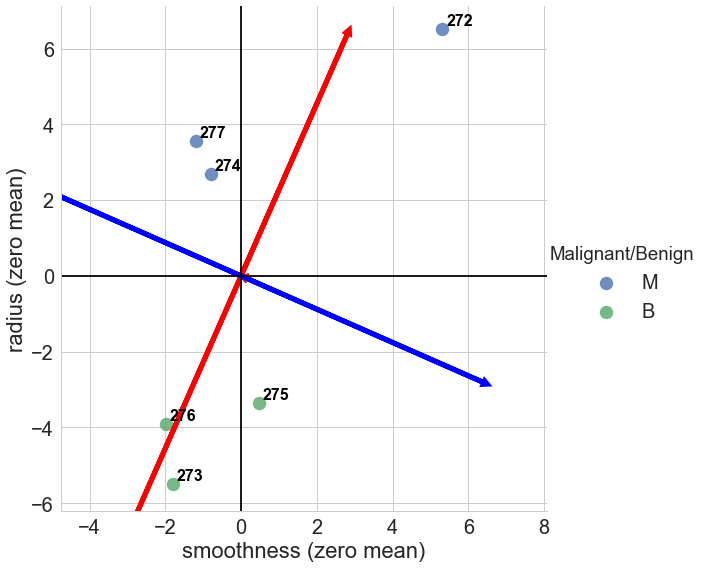

In [160]:
g1 = sns.lmplot('smoothness (zero mean)', 'radius (zero mean)', new_data, hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, size=8)
ax = g1.axes[0,0]

for i in range(272,278):
    x = new_data['smoothness (zero mean)'][i] + 0.1
    y = new_data['radius (zero mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

ax.scatter(0,0,  s=200, c='r', marker=(5, 2))
ax.axis('equal')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

scale = 7
ax.arrow(-scale*pc1_vec[0], -scale*pc1_vec[1], 2*scale*pc1_vec[0], 2*scale*pc1_vec[1], head_width=0.1, head_length=0.1, fc='r', ec='r', lw=5)
ax.arrow(-scale*pc2_vec[0], -scale*pc2_vec[1], 2*scale*pc2_vec[0], 2*scale*pc2_vec[1], head_width=0.1, head_length=0.1, fc='b', ec='b', lw=5)

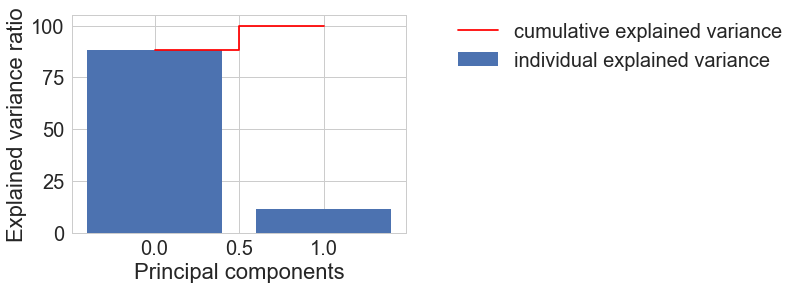

In [161]:
tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, 'r', where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))

print()

In [162]:
Xstar=X@Vt.T
new_data['pc1'] = Xstar[:,0]  
new_data['pc2'] = Xstar[:,1]  

In [175]:
f1 = Vt[:,0]
f2 = Vt[:,1]

Text(6.60834,-2.8166,'radius (zero mean)')

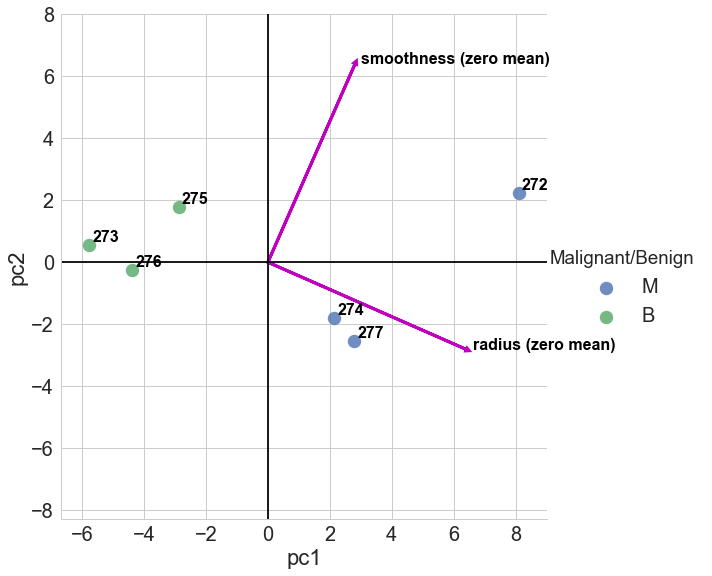

In [184]:
g1 = sns.lmplot('pc1', 'pc2', new_data, hue="Malignant/Benign", fit_reg=False, size=8, scatter_kws={"s": 180})
ax = g1.axes[0,0]
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis('equal')


for i in range(272,278):
    x = new_data['pc1'][i] + 0.1
    y = new_data['pc2'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

    
scale = 7
ax.arrow(0,0, scale*f1[0], scale*f1[1], head_width=0.1, head_length=0.1, fc='m', ec='m', lw=3)
ax.text(scale*f1[0]+0.2, scale*f1[1], "smoothness (zero mean)", horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)
ax.arrow(0,0, scale*f2[0], scale*f2[1], head_width=0.1, head_length=0.1, fc='m', ec='m', lw=3)
ax.text(scale*f2[0]+0.2, scale*f2[1], "radius (zero mean)", horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)


In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd

Example from:
http://setosa.io/ev/principal-component-analysis/

In [2]:
data = pd.io.parsers.read_csv("UK_foods.csv")
data.head()

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [3]:
headers = data['Unnamed: 0'].values.tolist()
print(headers)

new_data = data.drop(['Unnamed: 0'], axis=1)
new_data.head()

regions = new_data.columns.values.tolist()
print(regions)

['Cheese', 'Carcass_meat ', 'Other_meat ', 'Fish', 'Fats_and_oils ', 'Sugars', 'Fresh_potatoes ', 'Fresh_Veg ', 'Other_Veg ', 'Processed_potatoes ', 'Processed_Veg ', 'Fresh_fruit ', 'Cereals ', 'Beverages', 'Soft_drinks ', 'Alcoholic_drinks ', 'Confectionery ']
['England', 'Wales', 'Scotland', 'N.Ireland']


In [4]:
food = pd.DataFrame(new_data.values.T,columns=headers)
food['region'] = regions
food

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery,region
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54,England
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64,Wales
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62,Scotland
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41,N.Ireland


### This is when we want to try PCA!

In [5]:
#Performing PCA without scaling the data (to match the results from the website)
X = pd.DataFrame(food[headers], columns=headers)
# In general, PCA scales the variables to zero-mean (use line below to scale)
# X = pd.DataFrame(scale(food[headers]), columns=headers)

In [6]:
pca = PCA().fit(X)
pca_samples = pca.transform(X)

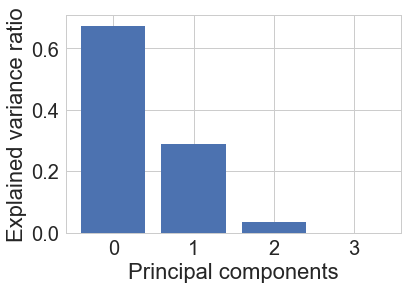

In [7]:
var_exp = pca.explained_variance_ratio_
plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance');
plt.ylabel('Explained variance ratio');
plt.xlabel('Principal components');

In [8]:
components = pd.DataFrame(pca.components_, columns = headers) 
components

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
0,-0.056955,0.047928,-0.258917,-0.084415,-0.005194,-0.037621,0.401402,-0.151850,-0.243594,-0.026886,-0.036488,-0.632641,-0.047703,-0.026188,0.232244,-0.463968,-0.029650
1,0.016013,0.013916,-0.015331,-0.050755,-0.095389,-0.043022,-0.715017,-0.144900,-0.225451,0.042851,-0.045452,-0.177741,-0.212600,-0.030561,0.555124,0.113537,0.005950
2,0.023943,0.063671,-0.553849,0.039065,-0.125223,-0.036057,-0.206682,0.213822,-0.053328,-0.073649,0.052892,0.400129,-0.358849,-0.041359,-0.169426,-0.498583,-0.052322
3,-0.409383,0.729482,0.331001,0.022376,0.034512,0.024943,0.021396,0.001607,0.031153,-0.017380,0.021251,0.227657,0.100043,-0.018382,0.222319,-0.273126,0.001891


Text(0.5,1,'influence of original variables(food) upon pc2')

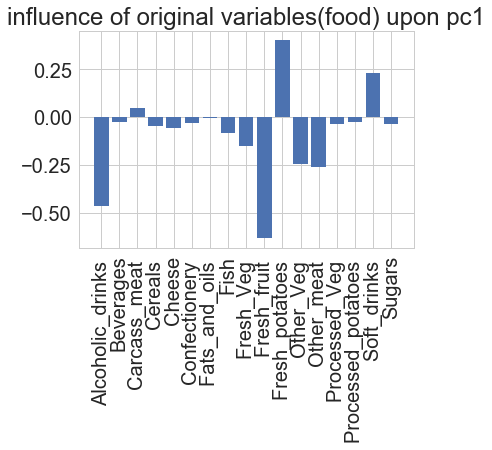

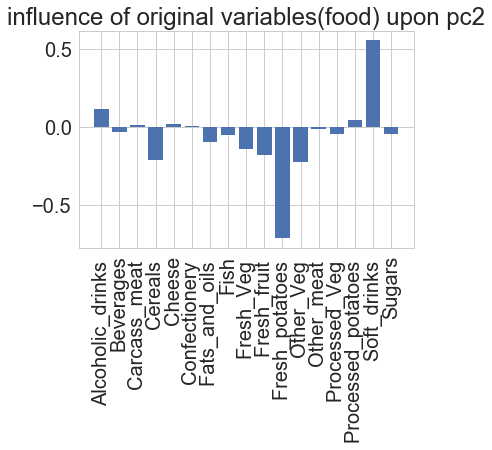

In [9]:
plt.figure()
plt.bar(headers,components.values[0])
plt.xticks(rotation=90)
plt.title('influence of original variables(food) upon pc1')
plt.figure()
plt.bar(headers,components.values[1])
plt.xticks(rotation=90)
plt.title('influence of original variables(food) upon pc2')

In [10]:
Xstar = pd.DataFrame(pca_samples,columns=['pc1','pc2','pc3','pc4'])
Xstar['region'] = regions
Xstar

,pc1,pc2,pc3,pc4,region
0,-144.993152,-2.532999,105.768945,-1.699297e-14,England
1,-240.529148,-224.646925,-56.475555,5.541582e-13,Wales
2,-91.869339,286.081786,-44.415495,-6.694069e-13,Scotland
3,477.391639,-58.901862,-4.877895,1.251362e-13,N.Ireland


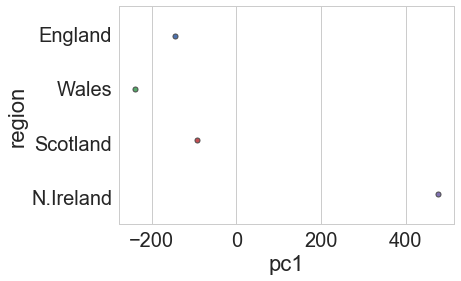

In [11]:
sns.stripplot(x="pc1",y="region", data=Xstar, jitter=0.05, linewidth=1)

Text(67.7201,0.5,'pc2')

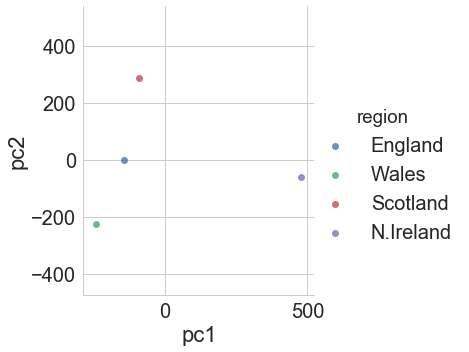

In [12]:
ax = plt.figure()
ax = sns.lmplot('pc1', 'pc2',Xstar,hue='region', fit_reg=False)
plt.axis('equal')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [13]:
def plot_arrow(v,scale,text_pos,text_label):
    plt.arrow(0, 0, scale*v[0], scale*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    plt.text(v[0]*text_pos, v[1]*text_pos, text_label, color='black', ha='center', va='center', fontsize=18)


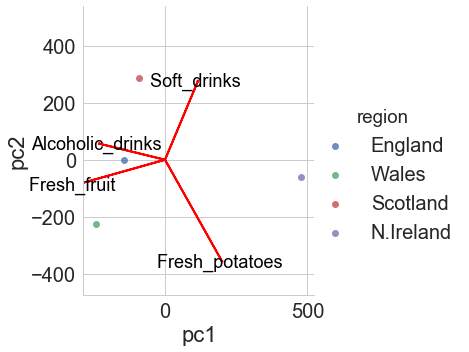

In [14]:
ax = plt.figure()
ax = sns.lmplot('pc1', 'pc2',Xstar,hue='region', fit_reg=False)
plt.axis('equal')
plt.xlabel('pc1')
plt.ylabel('pc2')

lab = ['Fresh_potatoes ',
 'Fresh_fruit ',
 'Soft_drinks ',
 'Alcoholic_drinks ']

for i,label in enumerate(lab):
    plot_arrow(components[label],500,500,label)

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Example from:
https://analyticsdefined.com/implementing-principal-component-analysis/

In [2]:
sales = pd.io.parsers.read_csv("Wholesale-customers-data.csv")
sales = sales.drop(["Channel", "Region"], axis=1)
sales.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Get the list of product types

In [3]:
# Get all the headers
header_labels = sales.columns.values.tolist()
header_labels

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


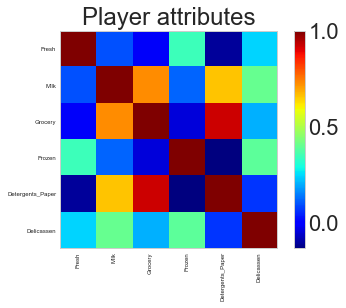

In [4]:
corr_matrix = sales.corr()
# plot correlation matrix
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(corr_matrix, cmap=cm.get_cmap('jet'))
plt.title('Player attributes')
plt.grid('off')
ax1.set_xticks(np.arange(len(header_labels)))
ax1.set_yticks(np.arange(len(header_labels)))
ax1.set_xticklabels(header_labels,fontsize=6,rotation=90)
ax1.set_yticklabels(header_labels,fontsize=6)
fig.colorbar(cax)

### This is when we want to try PCA!

In [5]:
data = pd.DataFrame(scale(sales), columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [6]:
pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

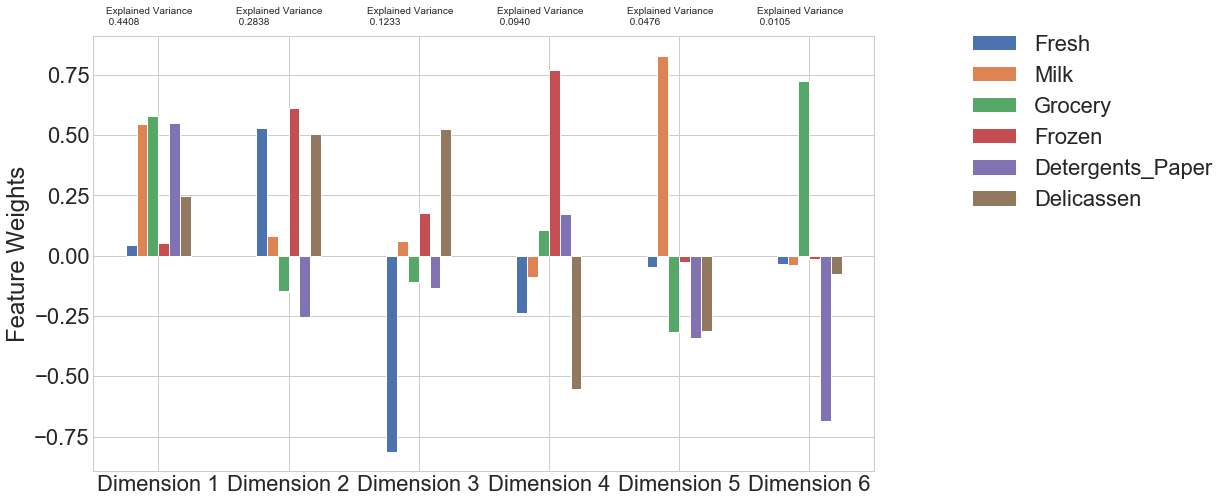

In [7]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
        
    ax.legend(bbox_to_anchor=(1.1, 1.05))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

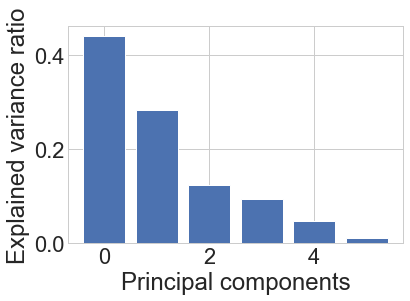

In [8]:
var_exp = pca.explained_variance_ratio_
plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance');
plt.ylabel('Explained variance ratio');
plt.xlabel('Principal components');

In [9]:
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

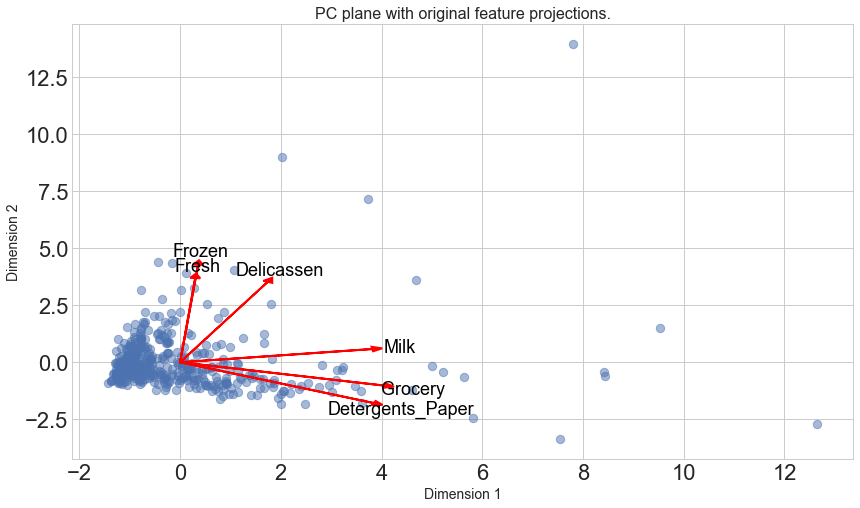

In [10]:
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

biplot(data, reduced_data, pca)

In [11]:
def plot_arrow(vector,scale,text_label):
    plt.arrow(0, 0, scale*vector[0], scale*vector[1], head_width=0.5, head_length=0.5, fc='k', ec='k', lw=1)
    plt.text(vector[0]*1.3*scale, vector[1]*1.3*scale, text_label , color='black', ha='center', va='center', fontsize=18)